# SO SÁNH MODEL UNSUPERVISED


## 1. Định nghĩa vấn đề (Define Problem)
- **Mô tả**:
    - Tập “Red Vinho Verde” (Bồ Đào Nha) thuộc bộ Wine Quality gốc UCI, được mirror trên Kaggle. Dữ liệu chỉ gồm thử nghiệm hoá lý và điểm cảm quan “quality”.
+ **Dữ liệu vào**:
    - fixed acidity - axit cố định 
    - volatile acidity - axit bay hơi
    - citric acid - axit citric
    - residual sugar - đường dư 
    - chlorides - Ion Clorua
    - free sulfur dioxide - SO2 chưa liên kết 
    - total sulfur dioxide - Tổng SO2 
    - density - khối lượng riêng của rượu
    - pH - mức đô axit/bazo của rượu
    - sulphates - hàm lượng ion sunfat trong rượu
    - alcohol - lượng ethanol theo thể tích trong rượu
+ **Kết quả**: quality (3-8)

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [119]:
# Importing all import python libraries
import pandas as pd
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2. Nạp dữ liệu (Load Dataset)

In [144]:
winequality_df = pd.read_csv("winequality-red.csv")
winequality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- Edit those columns (ex: fixed acidity -> fixed_acidity )

### 2.3. Thay đổi tên cột (Columns name change)

In [145]:
# winequality_df = winequality_df.rename(columns={"fixed acidity": "fixed_acidity"}) #single

cols_to_fix = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "free sulfur dioxide", "total sulfur dioxide"]
def normalize_selected_cols(df, cols):
    mapping = {c:c.strip().lower().replace(" ", "_") for c in cols}
    return df.rename(columns = mapping)

winequality_df = normalize_selected_cols(winequality_df, cols_to_fix)
winequality_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [146]:
# shape
print(f'+ Shape: {winequality_df.shape}')
# head, tail
print(f'+ Contents: ')
display.display(winequality_df.head(5))
display.display(winequality_df.tail(5))
# info
winequality_df.info()

+ Shape: (1599, 12)
+ Contents: 


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Nhận xét**:
+ •	Dữ liệu có 11 tính chất để phân lớp: Fixed acidity (g/L), Volatile acidity (g/L), Citric acid (g/L), Residual sugar (g/L), Chlorides (g/L), Free sulfur dioxide (mg/L), Total sulfur dioxide (mg/L)(mg/L), Density (g/cm³), pH, Sulphates (g/L), Alcohol (%)    
+ Tổng số dòng dữ liệu là 1599 dòng
+ Dữ liệu để target ở cột **quality** 

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [147]:
has_null = winequality_df.isnull().sum().any()
has_nan  = winequality_df.isna().sum().any()
n_duplicated = winequality_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(winequality_df[winequality_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(winequality_df[winequality_df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

if n_duplicated > 0:
    n_duplicated_rows = winequality_df[winequality_df.duplicated(keep=False)]
    display.display(n_duplicated_rows)

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 240


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


**Nhận xét**:
+ Dữ liệu có 244 bị trùng và không có giá trị rỗng (NaN, Null)

Xu lý:
winequality_df = winequality_df.drop_duplicates(keep="first").reset_index(drop=True)


#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [148]:
winequality_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Nhận xét**:
+ fixed_acidity (7.9 < 8.32), volatile_acidity (0.52 < 0.528), citric_acid (0.26 < 0.27), residual_sugar (2.2 < 2.54), chlorides (0.08 < 0.09), free_SO2 (14 < 15.9), total_SO2 (38 < 46.47), sulphates (0.62 < 0.66), alcohol (10.2 < 10.42) → nhiều biến có khả năng đuôi phải. </br>
+ density (0.9), pH (3.3) → cân bằng </br>
+ quality (6 > 5.63) → có khả năng lệch trái

## 4. EDA and DATA VISUALIZATION

### 1. **Mối tương quan giữa các tính chất (Correlations)**

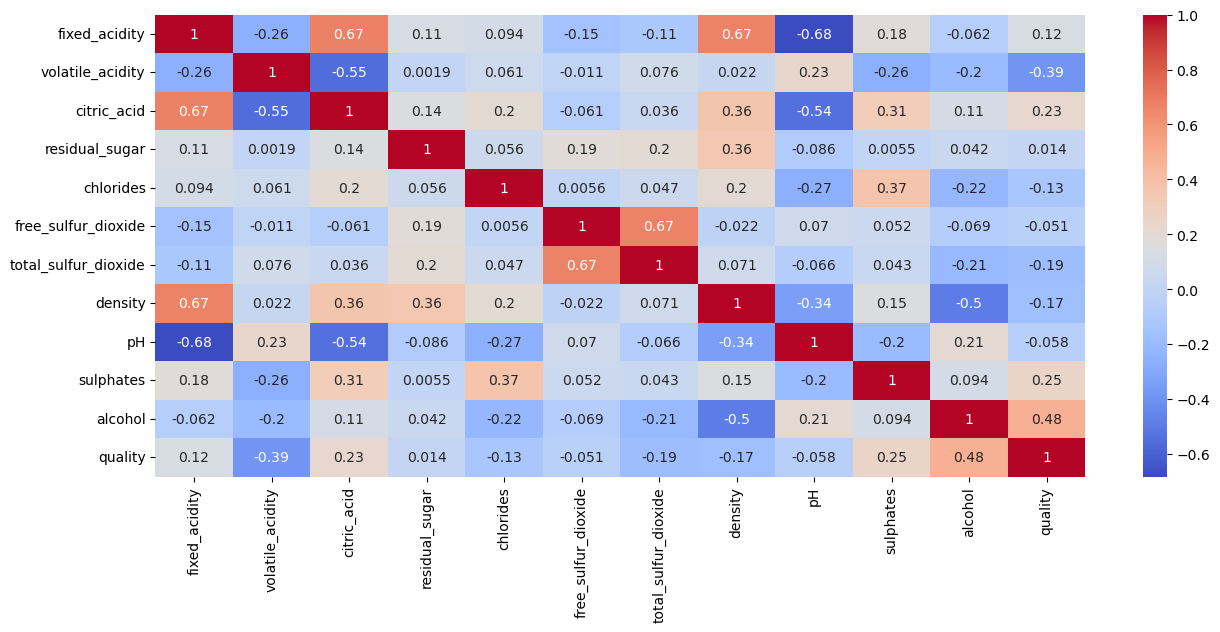

In [149]:
plt.figure(figsize=(15, 6)) #Create canvas
sns.heatmap(winequality_df.corr(), annot= True, cmap="coolwarm")
plt.show() 

**Nhận xét:** </br>
- Có nhiều cột tương quan dương rõ rệt như:
    - fixed_acidity - citric_acid (0.67)
    - fixed_acidity - density (0.67)
    - citric_acid - density (0.36)
    - citric_acid - sulphates (0.31)
    - residual_sugar - density (0.36)
    - chlorides - sulphates (0.37)
    - totalSO2 - freeSO2 (0.67)
    - alocohol - quality (0.48)
- Bên cạnh đó cũng có các cột tương quan âm:
    - fixed_acidity - pH (-0.68)
    - ctric_acid - volatile_acidity (-0.55)
    - ctric_acid - pH (-0.54)
    - density - alcohol (-0.5)
    - density - pH (-0.34)
    - volatile_acidity - quality (-0.39)

### 2. Các biểu đồ

1) Boxplot

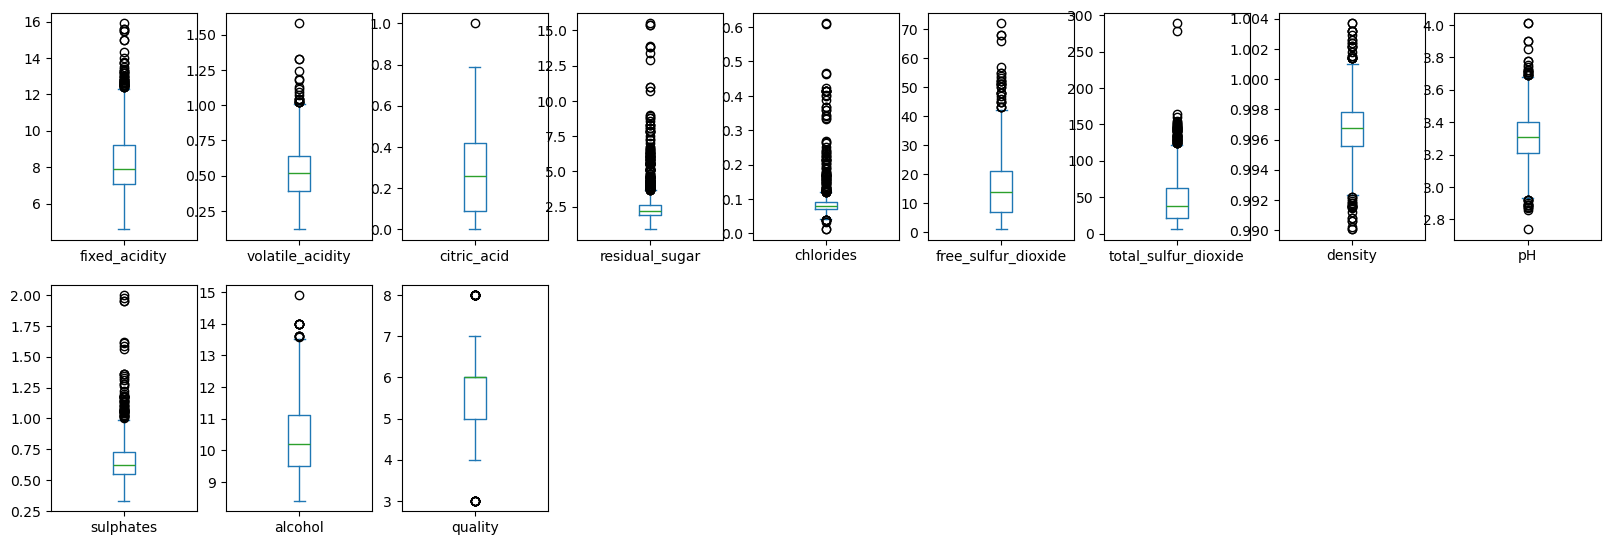

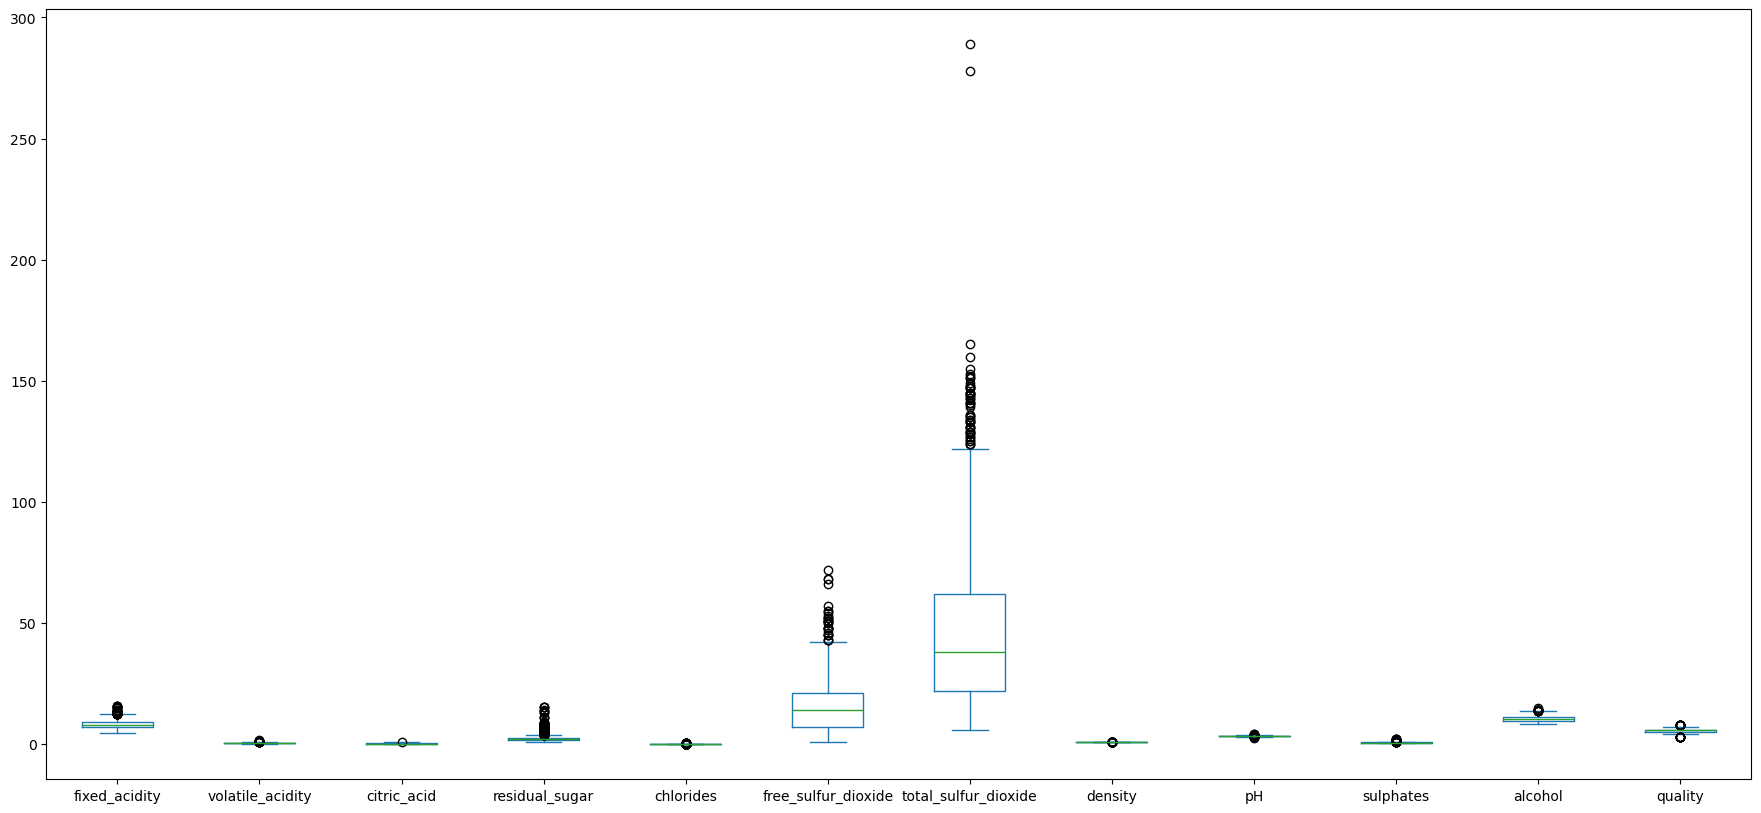

In [150]:
cols_f = winequality_df.iloc[:, :12]
cols_f.plot(kind="box", subplots=True, layout=(3, 9), sharex=False, sharey=False, figsize=(20,10))
cols_f.plot(kind="box", figsize=(22,10))
plt.savefig("abc.pdf")

**Nhận xét:**
- Ngoại trử citric_acid ra các yếu tố khác đều có rất nhiều giá trị outlier, khiến chúng bị lệch phải và trái nhiều

2) Histogram


**Nhận xét:**
- Từ biểu đồ của fixed_acidity, volatile_acidity và citric_acid ta thấy rằng độ phân bố bị lệch phải 
- Tuy nhiên với biểu đồ fixed_acidity lại cân đối khi có 1 đỉnh, 2 biểu đồ còn lại thì xuất hiện nhiều đỉnh
1. Đối với fixed_acidity các giá trị nằm trong khoảng $[7-8]$
2. Đối với volatile_acidity các giá trị nằm trong khoảng $[0.4 - 0.7]$
3. Đối với citric_acid các giá trị nằm trong khoảng $[0.0 - 0.1]$

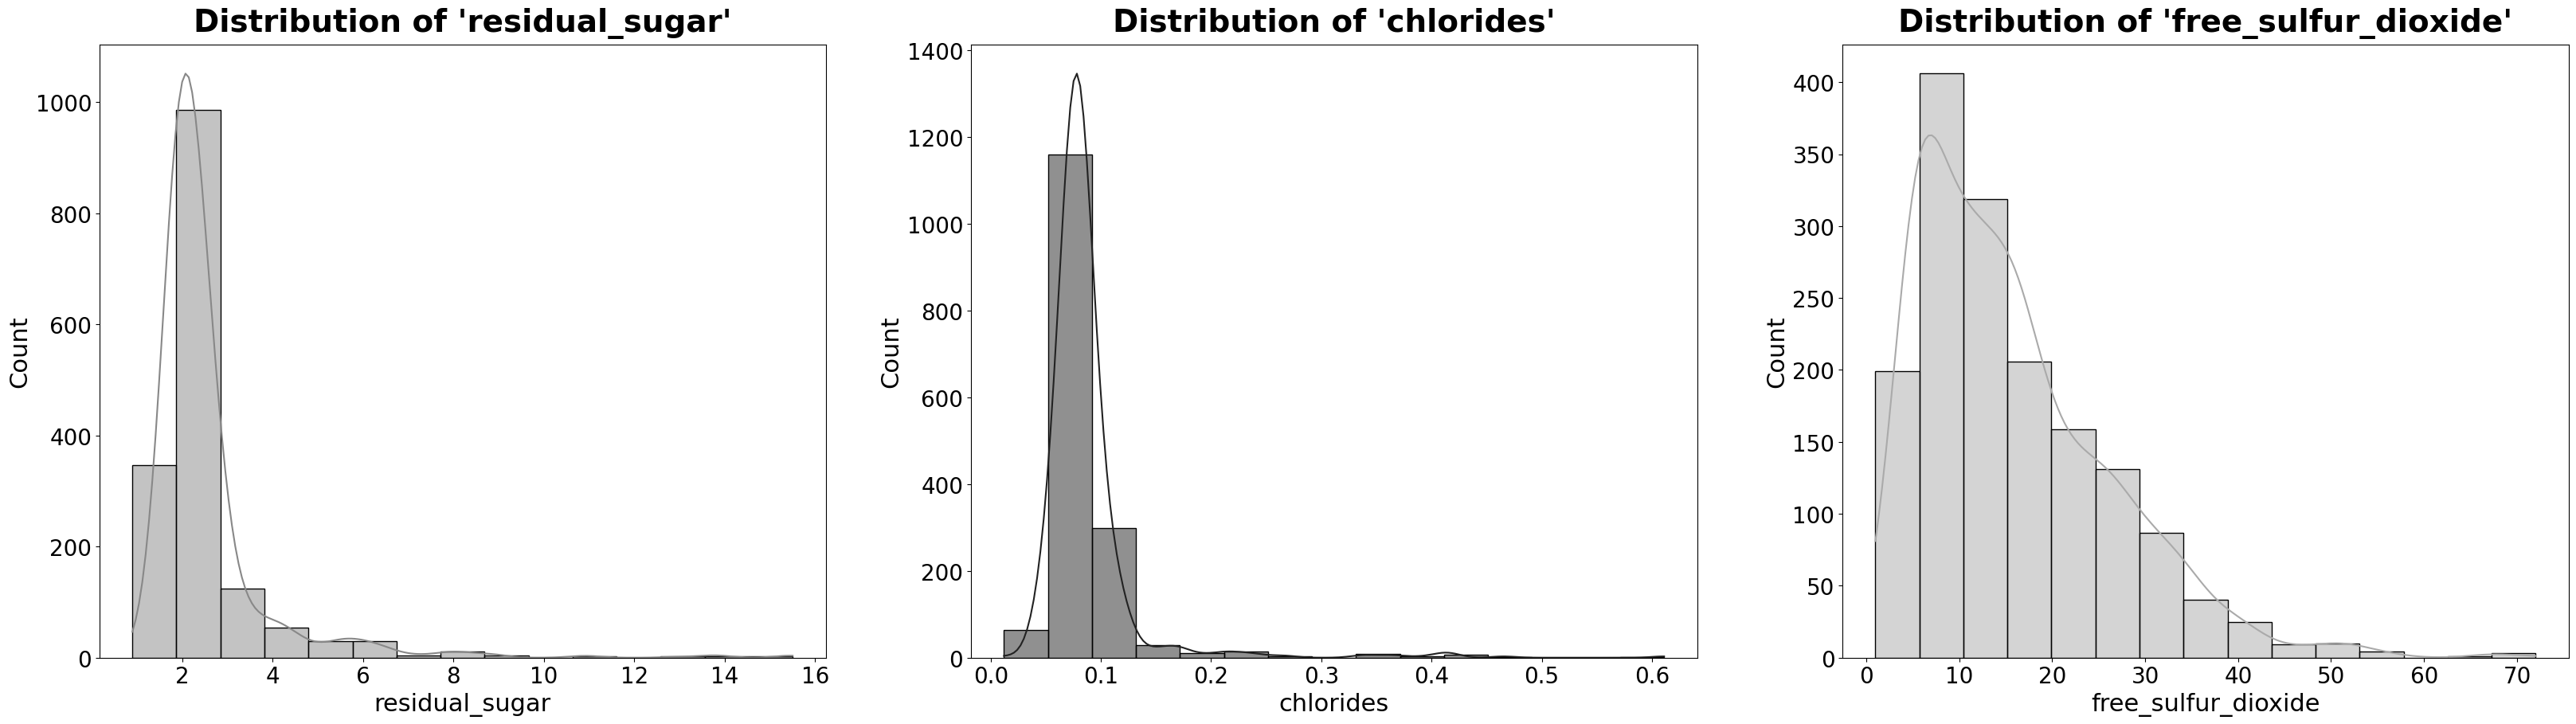

In [156]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))
sns.histplot(ax = axes[0], x = winequality_df["residual_sugar"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#888888").set(title = "Distribution of 'residual_sugar'")

sns.histplot(ax = axes[1], x = winequality_df["chlorides"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#222222").set(title = "Distribution of 'chlorides'")

sns.histplot(ax = axes[2], x = winequality_df["free_sulfur_dioxide"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#AAAAAA").set(title = "Distribution of 'free_sulfur_dioxide'")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của residual_sugar, chlorides và free_sulfur_dioxide ta thấy rằng độ phân bố bị lệch phải 
- Tuy nhiên cả 3 biểu đồ này đều khá cân đối
1. Đối với residual_sugar các giá trị nằm trong khoảng $[1 - 2.5]$
2. Đối với chlorides các giá trị nằm trong khoảng $[0.085 - 0.15]$
3. Đối với free_sulfur_dioxide các giá trị nằm trong khoảng $[0 - 15]$

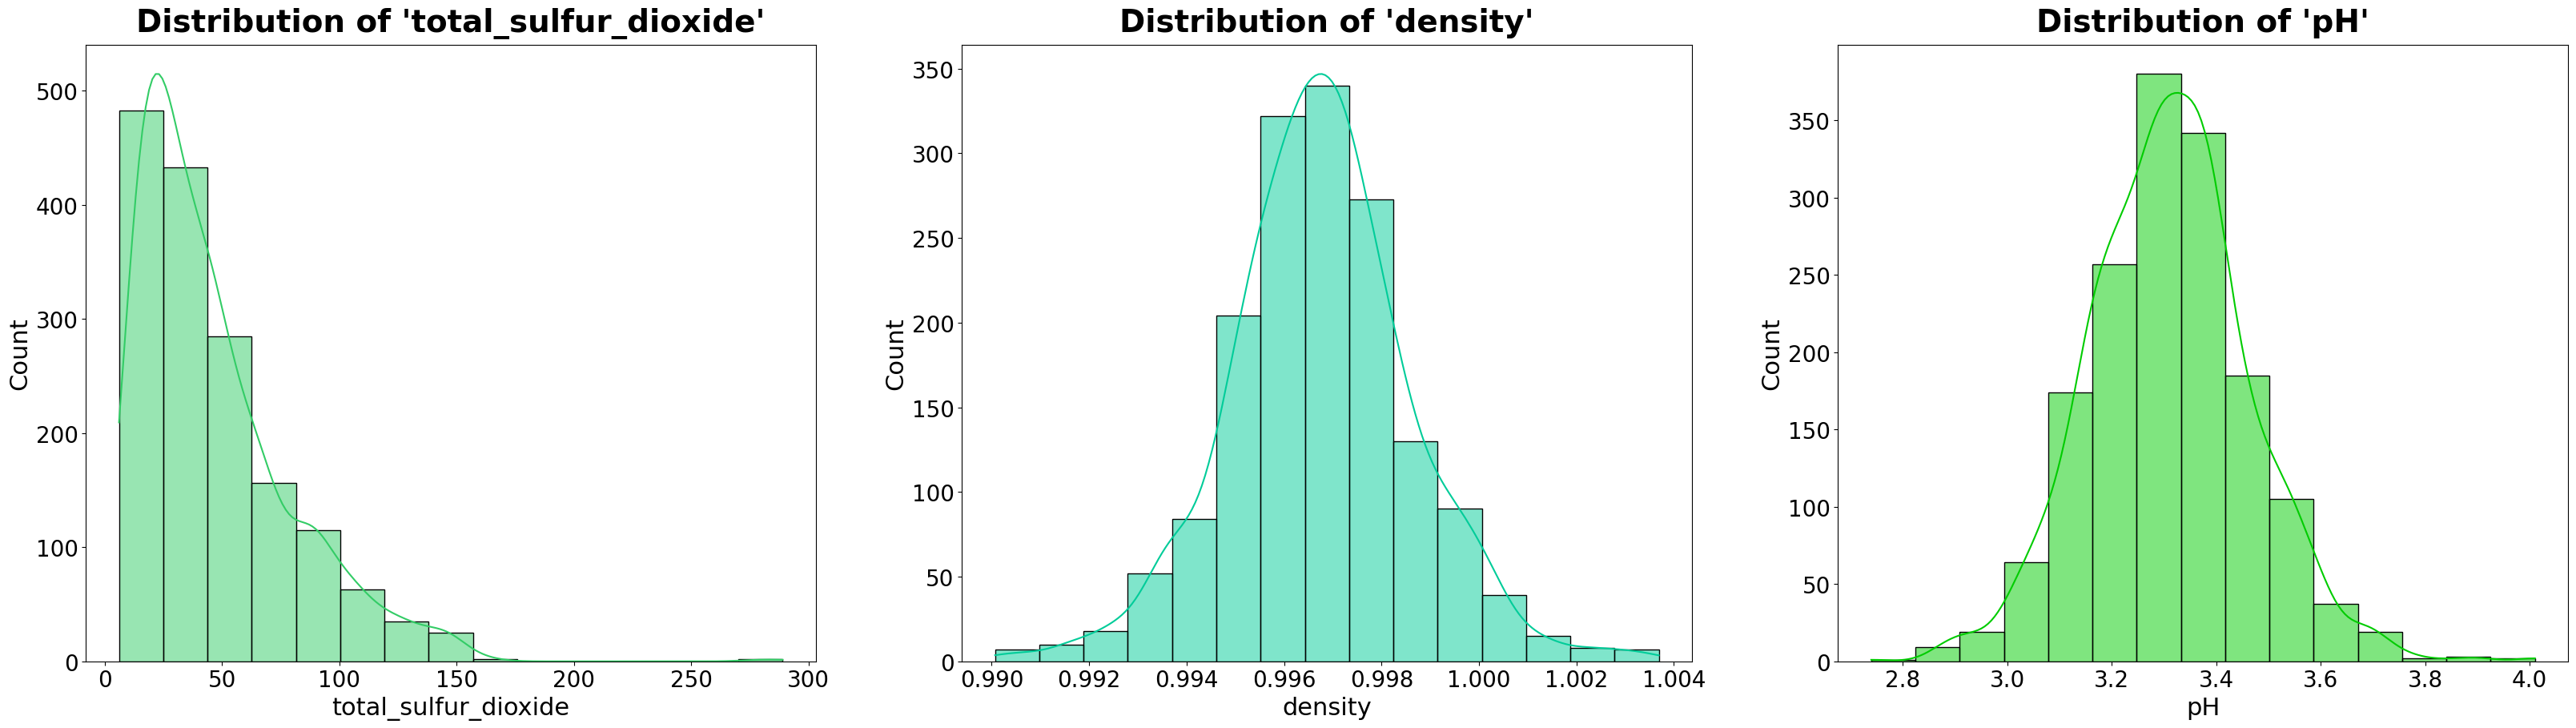

In [162]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))
sns.histplot(ax = axes[0], x = winequality_df["total_sulfur_dioxide"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#33CC66").set(title = "Distribution of 'total_sulfur_dioxide'")

sns.histplot(ax = axes[1], x = winequality_df["density"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#00CC99").set(title = "Distribution of 'density'")

sns.histplot(ax = axes[2], x = winequality_df["pH"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#00CC00").set(title = "Distribution of 'pH'")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của total_sulfur_dioxide, density và pH ta thấy rằng độ phân bố bị lệch phải 
- Tuy nhiên cả 3 biểu đồ này đều khá cân đối
1. Đối với total_sulfur_dioxide các giá trị nằm trong khoảng $[0 - 30]$
2. Đối với density các giá trị nằm trong khoảng $[0.995 - 0.998]$
3. Đối với pH các giá trị nằm trong khoảng $[3.2 - 3.4]$

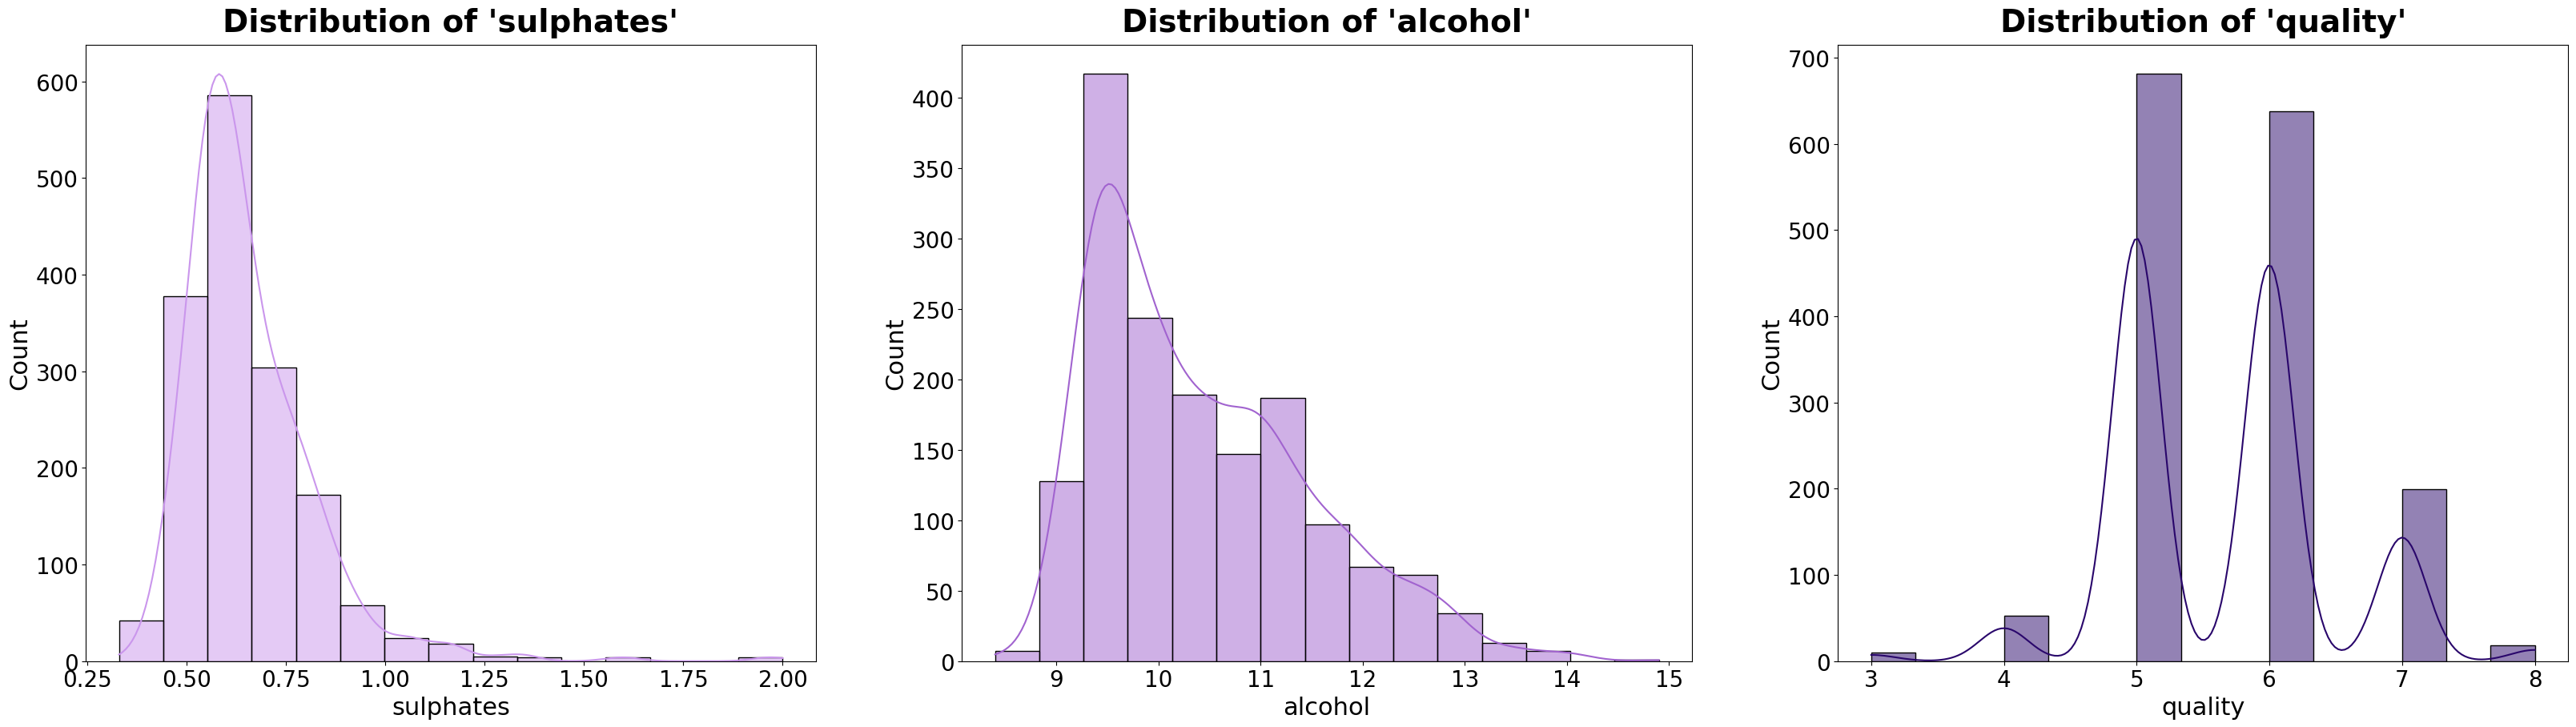

In [130]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))
sns.histplot(ax = axes[0], x = winequality_df["sulphates"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'sulphates'")

sns.histplot(ax = axes[1], x = winequality_df["alcohol"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'alcohol'")

sns.histplot(ax = axes[2], x = winequality_df["quality"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'quality'")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của sulphates, alcohol ta thấy rằng độ phân bố bị lệch phải
- Tuy nhiên sulphates phân phối đều, đối với alcohol thì khá cân bằng. Ngoại trừ quality thì nhiều đỉnh khiến phân bố lộn xộn 
1. Đối với sulphates các giá trị nằm trong khoảng $[0.50 - 0.75]$
2. Đối với alcohol các giá trị nằm trong khoảng $[9 - 10]$
3. Đối với quality các giá trị nằm trong khoảng $5$ và $6$

3) Scatter

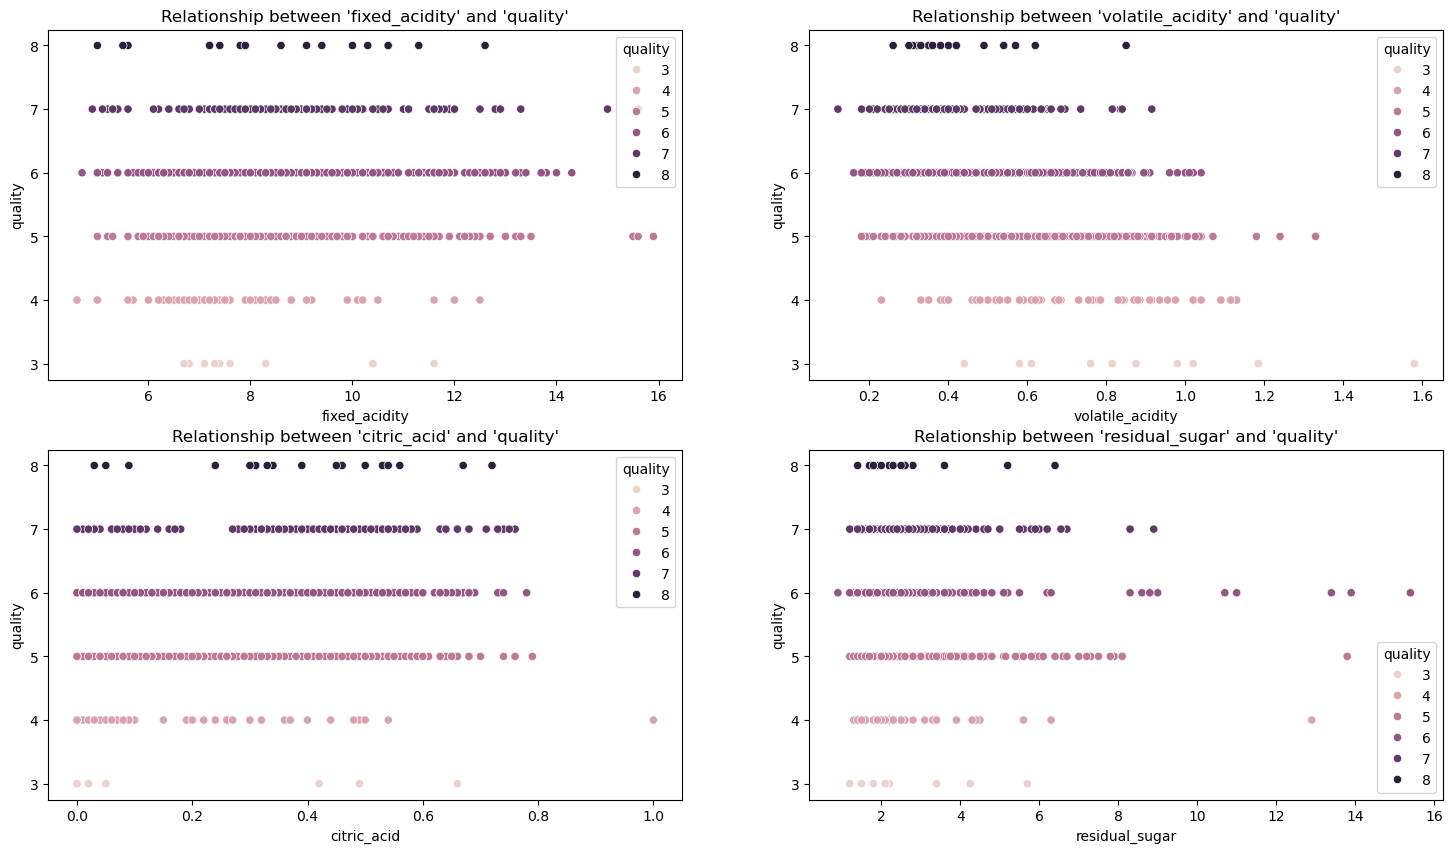

In [131]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "fixed_acidity",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'fixed_acidity' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "volatile_acidity",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'volatile_acidity' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "citric_acid",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'citric_acid' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'residual_sugar' and 'quality'");

**Nhận xét**
- Fixed Acidity vs quality
    -	Đối với Fixed Acidity biểu đồ cho thấy sự phân tán rộng của các điểm dữ liệu. Các loại rượu có chất lượng từ thấp đến cao (cụ thể là từ 4 đến 7) xuất hiện trên toàn bộ dải giá trị của fixed_acidity, tuy nhiên với lượng Fixed Acidity [12-14 g/L] vẫn có tập trung chất lượng rượu khá (5,6). 

    => Axit cố định (Fixed Acidity) không phải là một yếu tố có ảnh hưởng rõ rệt hoặc một chỉ báo đáng tin cậy để dự đoán chất lượng rượu vang.
- Volatile Acidity vs quality
    -	Đối với Volatile Acidity biểu đồ thể hiện một mối tương quan nghịch (âm) rõ ràng. Các loại rượu có chất lượng cao (điểm 6, 7, 8) tập trung chủ yếu ở vùng có nồng độ volatile_acidity thấp (dưới 0.7), trong khi rượu chất lượng thấp hơn lại có xu hướng phân bố ở vùng nồng độ cao hơn.

    => Axit dễ bay hơi (Volatile Acidity) là một chỉ số quan trọng, ảnh hưởng tiêu cực đến chất lượng rượu. Về mặt hóa học, nồng độ cao của axit axetic (thành phần chính của volatile_acidity) sẽ tạo ra mùi giống giấm, một đặc tính không mong muốn, từ đó làm giảm chất lượng cảm quan của sản phẩm.
- Axit Citric vs quality
    -	Đối với Axit Citric mặc dù dữ liệu có độ phân tán, một xu hướng tương quan thuận (dương) có thể được nhận thấy. Cụ thể, khi nồng độ citric_acid vượt ngưỡng 0.5, mật độ các loại rượu có chất lượng cao tăng lên đáng kể.

    => Axit citric (Citric Acid) là một yếu tố có ảnh hưởng tích cực đến chất lượng rượu. Về mặt cảm quan, axit citric góp phần tạo nên sự tươi mát (freshness) và hương vị trái cây cho rượu, giúp nâng cao trải nghiệm của người dùng.
- Residual sugar vs quality
    -	Tương tự như fixed_acidity, biểu đồ của residual_sugar cho thấy các điểm dữ liệu phân tán rộng mà không tuân theo một quy luật hay xu hướng cụ thể nào.
    => Đường tồn dư (Residual Sugar) không cho thấy mối liên hệ rõ ràng với chất lượng rượu vang. Điều này cho thấy rằng vị ngọt không phải là yếu tố quyết định đến việc một loại rượu được đánh giá là ngon hay không trong tập dữ liệu này.



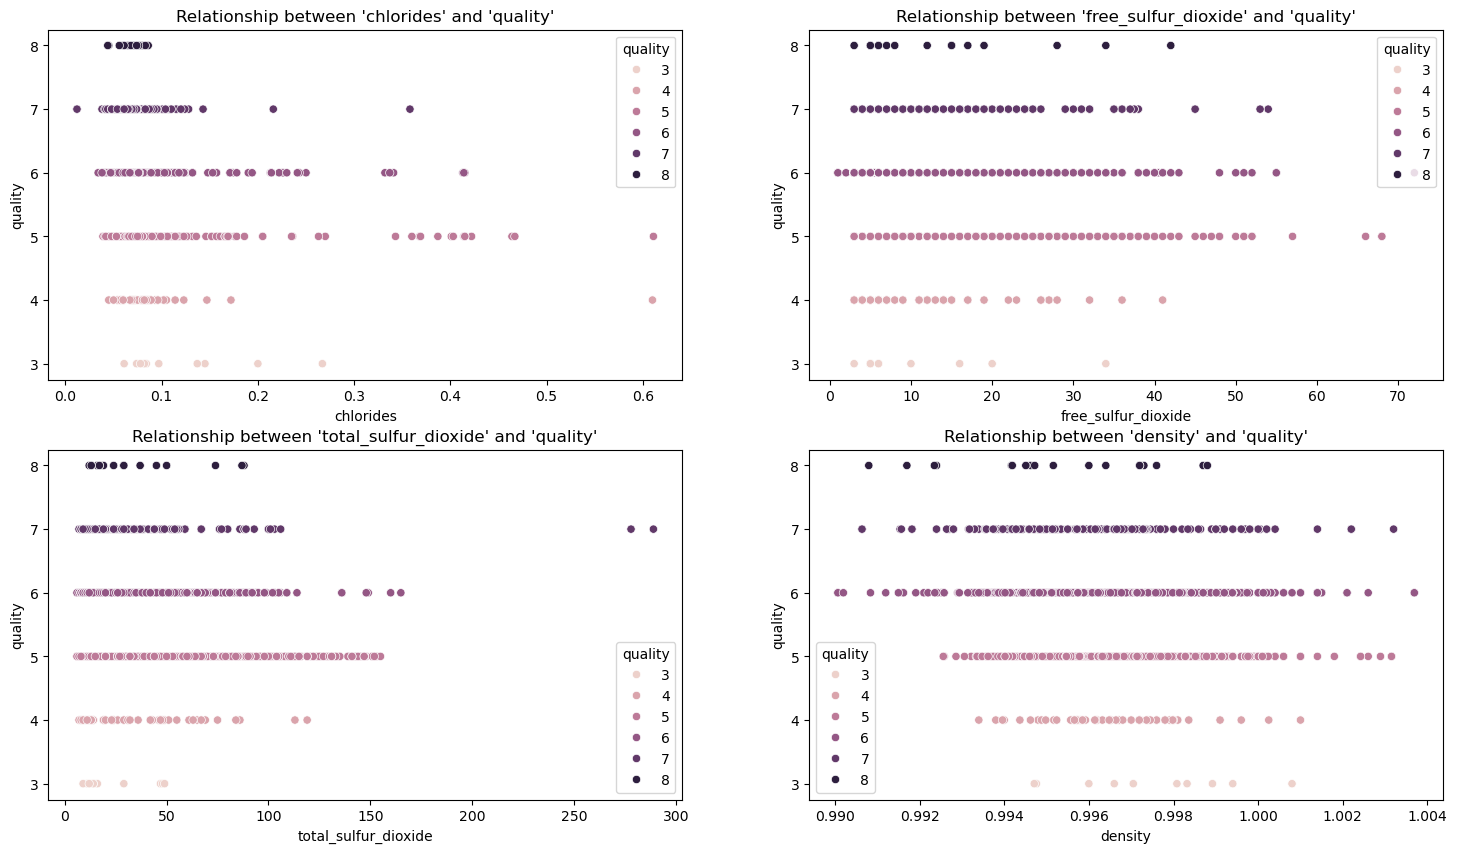

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "chlorides",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'chlorides' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "free_sulfur_dioxide",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'free_sulfur_dioxide' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "total_sulfur_dioxide",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'total_sulfur_dioxide' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'density' and 'quality'");

**Nhận xét:**
- Clorides vs quality
    -	Biểu đồ Clorides không cho thấy một mối tương quan. Các loại rượu có chất lượng từ thấp đến cao tuy tập trung vào nồng độ muối thấp (dưới 0.1 g/L) nhưng không cho thấy được là yếu tố gây ảnh hưởng đến chất lượng rượu.

    => Nồng độ muối là một yếu tố không ảnh hưởng đến chất lượng rượu.
- Free SO₂ vs quality
    -	Tương tự như fixed_acidity và residual_sugar, biểu đồ của free_SO₂ cho thấy các điểm dữ liệu phân tán rộng mà không hình thành một xu hướng rõ ràng. Ở mọi mức chất lượng, đều có sự hiện diện của rượu với hàm lượng SO₂ tự do từ thấp đến cao.
    
    => Dựa trên biểu đồ, lưu huỳnh đioxit tự do không phải là một yếu tố dự báo đáng tin cậy cho chất lượng rượu vang.
- Total SO₂ vs quality
    -	Mặc dù biểu đồ cũng cho thấy sự phân tán rộng, một khuynh hướng nhẹ có thể được nhận thấy. Tuy vậy nó vẫn không đánh giá được ảnh hưởng đến chất lượng rượu.
    
    => Tổng nồng độ SO₂ không phải là yếu tố ảnh hưởng đến chất lượng rượu. Tuy vào đó cần thắt chặt lượng SO₂ để đảm bảo an toàn sức khỏe người sử dụng 
- Density vs quality
    -	Biểu đồ thể hiện một mối tương quan nghịch rất rõ ràng và mạnh mẽ. Rượu chất lượng cao tập trung dày đặc ở vùng có tỷ trọng thấp (dưới 0.993 g/cm³), trong khi rượu chất lượng thấp hơn có xu hướng ở vùng tỷ trọng cao hơn.
    
    => Tỷ trọng là một yếu tố dự báo chất lượng quan trọng. Về mặt vật lý, tỷ trọng của rượu là một hàm số của hai thành phần chính: nồng độ cồn và đường tồn dư (đường làm tăng tỷ trọng). Như đã phân tích trước đó, rượu chất lượng cao thường có nồng độ cồn cao và lượng đường tồn dư không quá lớn. Sự kết hợp này dẫn đến tỷ trọng thấp hơn, biến density trở thành một chỉ báo tổng hợp hiệu quả cho chất lượng rượu.


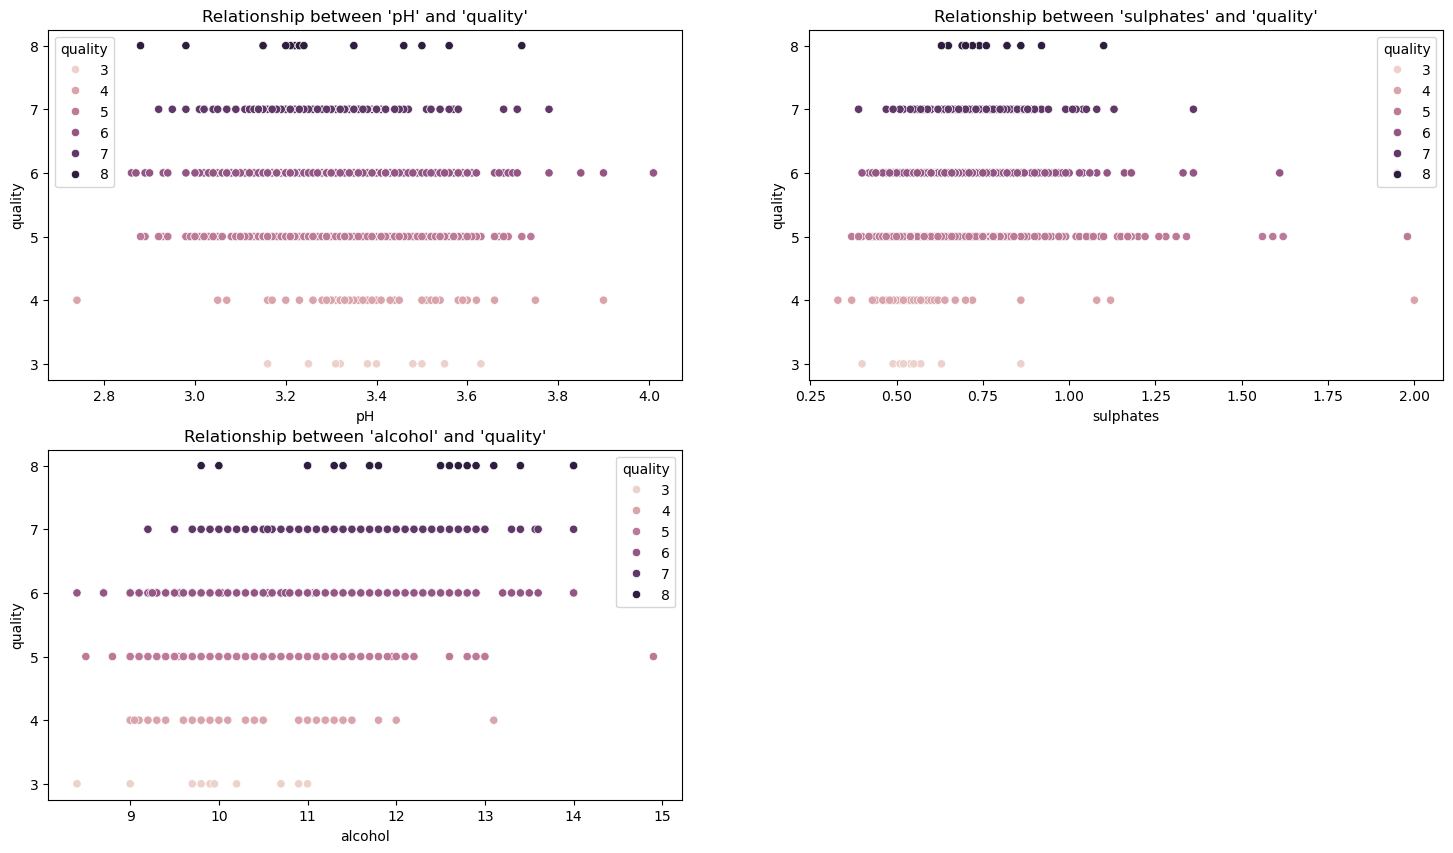

In [133]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "pH",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "sulphates",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'sulphates' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'alcohol' and 'quality'");
fig.delaxes(axes[3])

**Nhận xét:**
- Density vs quality
    -	Mặc dù trên toàn dải giá trị, độ pH không cho thấy một xu hướng tuyến tính rõ ràng, việc phân tích sâu hơn vào các khoảng cụ thể lại phát hiện ra một insight quan trọng. Trong khoảng pH từ 2.9 đến dưới 3.2, có một sự tập trung đáng chú ý của các loại rượu chất lượng cao và không có sự hiện diện của rượu chất lượng thấp.

    => Độ pH trong khoảng hẹp [2.9, 3.2] có thể là một yếu tố ảnh hưởng tích cực đến chất lượng. Điều này cho thấy một độ axit cao và được kiểm soát chặt chẽ có thể là điều kiện cần để đạt được chất lượng tốt. Yếu tố này cần được nghiên cứu sâu hơn để xác nhận đây là một "khoảng giá trị tối ưu".
- Sulphates vs quality
    -	Biểu đồ cho thấy một vùng các điểm dữ liệu rõ rệt. Trong khoảng nồng độ từ 0.75 đến 1.20 g/L, có sự tập trung mạnh mẽ của các loại rượu có chất lượng tốt (điểm 6, 7). Ngoài khoảng này, dữ liệu trở nên phân tán hơn.
    
    => Hàm lượng sunfat là một yếu tố có ảnh hưởng mạnh, đặc biệt trong khoảng [0.75, 1.20]. Về mặt hóa học, sunfat (SO₄²⁻) là một nguồn cung cấp SO₂, một chất bảo quản và chống oxy hóa quan trọng. Việc duy trì nồng độ sunfat trong khoảng tối ưu này có thể giúp bảo vệ hương vị và cấu trúc của rượu một cách hiệu quả nhất.
- Alcohol vs quality
    -	Tương tự các yếu tố trên, việc xác định khoảng giá trị quan trọng mang lại nhiều thông tin hơn là nhìn vào xu hướng chung. Dữ liệu cho thấy trong khoảng nồng độ cồn từ 11% đến 14%, có sự hội tụ của các loại rượu chất lượng từ trung bình đến cao.
    
    => Nồng độ cồn là một yếu tố then chốt, với khoảng tối ưu nằm trong khoảng [11%, 14%]. Nồng độ cồn cao ảnh hưởng đến cảm nhận về hương vị và sự cân bằng tổng thể. Việc đạt được nồng độ cồn trong khoảng này dường như là một yếu tố quan trọng để sản xuất ra rượu vang chất lượng.


**Từ tất cả các nhận định trên, ta phân chia các yếu tố thành các loại:**

| Ảnh hưởng mạnh                | Ảnh hưởng nhẹ             | Không ảnh hưởng  |
|------------------------------|---------------------------|------------------|
| `Volatile_acidity` \< 0.7    | `Fixed_acidity` 12–14     |`Chlorides`      |
| `Citric_acid` \> 0.5         | `Total_SO2` 70–120        | `Residual_Sugar` |
| `Sulphates` 0.75–1.20        | `Density` \< 0.993        | `Free_SO2`       |
| `Alcohol` 11–14              | `pH` 2.8–3.0              |                  |



## 1. Định nghĩa vấn đề (Define Problem)
- **Mô tả**:
    - Tập “Red Vinho Verde” (Bồ Đào Nha) thuộc bộ Wine Quality gốc UCI, được mirror trên Kaggle. Dữ liệu chỉ gồm thử nghiệm hoá lý và điểm cảm quan “quality”.
+ **Dữ liệu vào**:
    - fixed acidity - axit cố định 
    - volatile acidity - axit bay hơi
    - citric acid - axit citric
    - residual sugar - đường dư 
    - chlorides - Ion Clorua
    - free sulfur dioxide - SO2 chưa liên kết 
    - total sulfur dioxide - Tổng SO2 
    - density - khối lượng riêng của rượu
    - pH - mức đô axit/bazo của rượu
    - sulphates - hàm lượng ion sunfat trong rượu
    - alcohol - lượng ethanol theo thể tích trong rượu
+ **Kết quả**: quality (3-8)

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [134]:
# Importing all import python libraries
import pandas as pd
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2. Nạp dữ liệu (Load Dataset)

In [135]:
winequality_df = pd.read_csv("marketing_campaign.csv")
winequality_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


- Edit those columns (ex: fixed acidity -> fixed_acidity )

### 2.3. Thay đổi tên cột (Columns name change)

In [136]:
# winequality_df = winequality_df.rename(columns={"fixed acidity": "fixed_acidity"}) #single

cols_to_fix = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "free sulfur dioxide", "total sulfur dioxide"]
def normalize_selected_cols(df, cols):
    mapping = {c:c.strip().lower().replace(" ", "_") for c in cols}
    return df.rename(columns = mapping)

winequality_df = normalize_selected_cols(winequality_df, cols_to_fix)
winequality_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [137]:
# shape
print(f'+ Shape: {winequality_df.shape}')
# head, tail
print(f'+ Contents: ')
display.display(winequality_df.head(5))
display.display(winequality_df.tail(5))
# info
winequality_df.info()

+ Shape: (2240, 29)
+ Contents: 


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Nhận xét**:
+ •	Dữ liệu có 11 tính chất để phân lớp: Fixed acidity (g/L), Volatile acidity (g/L), Citric acid (g/L), Residual sugar (g/L), Chlorides (g/L), Free sulfur dioxide (mg/L), Total sulfur dioxide (mg/L)(mg/L), Density (g/cm³), pH, Sulphates (g/L), Alcohol (%)    
+ Tổng số dòng dữ liệu là 1599 dòng
+ Dữ liệu để target ở cột **quality** 

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [138]:
has_null = winequality_df.isnull().sum().any()
has_nan  = winequality_df.isna().sum().any()
n_duplicated = winequality_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(winequality_df[winequality_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(winequality_df[winequality_df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

if n_duplicated > 0:
    n_duplicated_rows = winequality_df[winequality_df.duplicated(keep=False)]
    display.display(n_duplicated_rows)

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


+ Có giá trị Nan: True


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


+ Số dòng trùng: 0


**Nhận xét**:
+ Dữ liệu có 244 bị trùng và không có giá trị rỗng (NaN, Null)

Xu lý:
winequality_df = winequality_df.drop_duplicates(keep="first").reset_index(drop=True)


#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [139]:
winequality_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**Nhận xét**:
+ fixed_acidity (7.9 < 8.32), volatile_acidity (0.52 < 0.528), citric_acid (0.26 < 0.27), residual_sugar (2.2 < 2.54), chlorides (0.08 < 0.09), free_SO2 (14 < 15.9), total_SO2 (38 < 46.47), sulphates (0.62 < 0.66), alcohol (10.2 < 10.42) → nhiều biến có khả năng đuôi phải. </br>
+ density (0.9), pH (3.3) → cân bằng </br>
+ quality (6 > 5.63) → có khả năng lệch trái

## 4. EDA and DATA VISUALIZATION

### 1. **Mối tương quan giữa các tính chất (Correlations)**

In [140]:
plt.figure(figsize=(15, 6)) #Create canvas
sns.heatmap(winequality_df.corr(), annot= True, cmap="coolwarm")
plt.show() 

ValueError: could not convert string to float: 'Graduation'

<Figure size 1500x600 with 0 Axes>

**Nhận xét:** </br>
- Có nhiều cột tương quan dương rõ rệt như:
    - fixed_acidity - citric_acid (0.67)
    - fixed_acidity - density (0.67)
    - citric_acid - density (0.36)
    - citric_acid - sulphates (0.31)
    - residual_sugar - density (0.36)
    - chlorides - sulphates (0.37)
    - totalSO2 - freeSO2 (0.67)
    - alocohol - quality (0.48)
- Bên cạnh đó cũng có các cột tương quan âm:
    - fixed_acidity - pH (-0.68)
    - ctric_acid - volatile_acidity (-0.55)
    - ctric_acid - pH (-0.54)
    - density - alcohol (-0.5)
    - density - pH (-0.34)
    - volatile_acidity - quality (-0.39)

### 2. Các biểu đồ

1) Boxplot

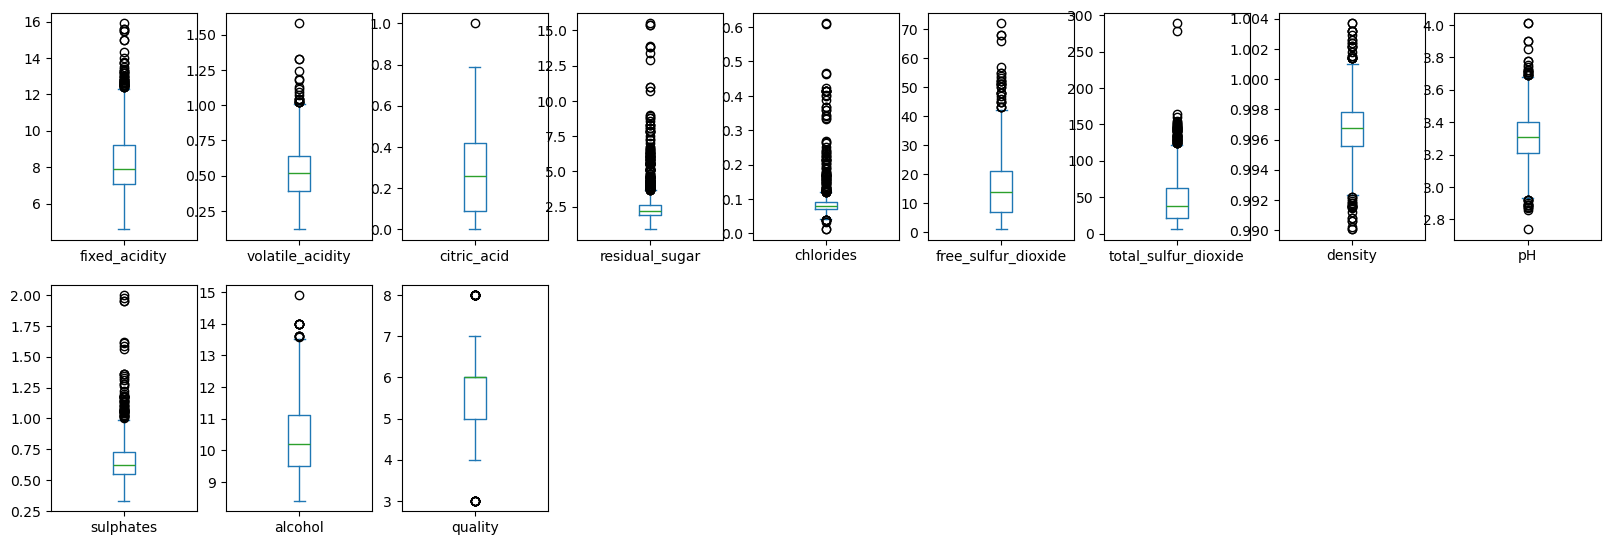

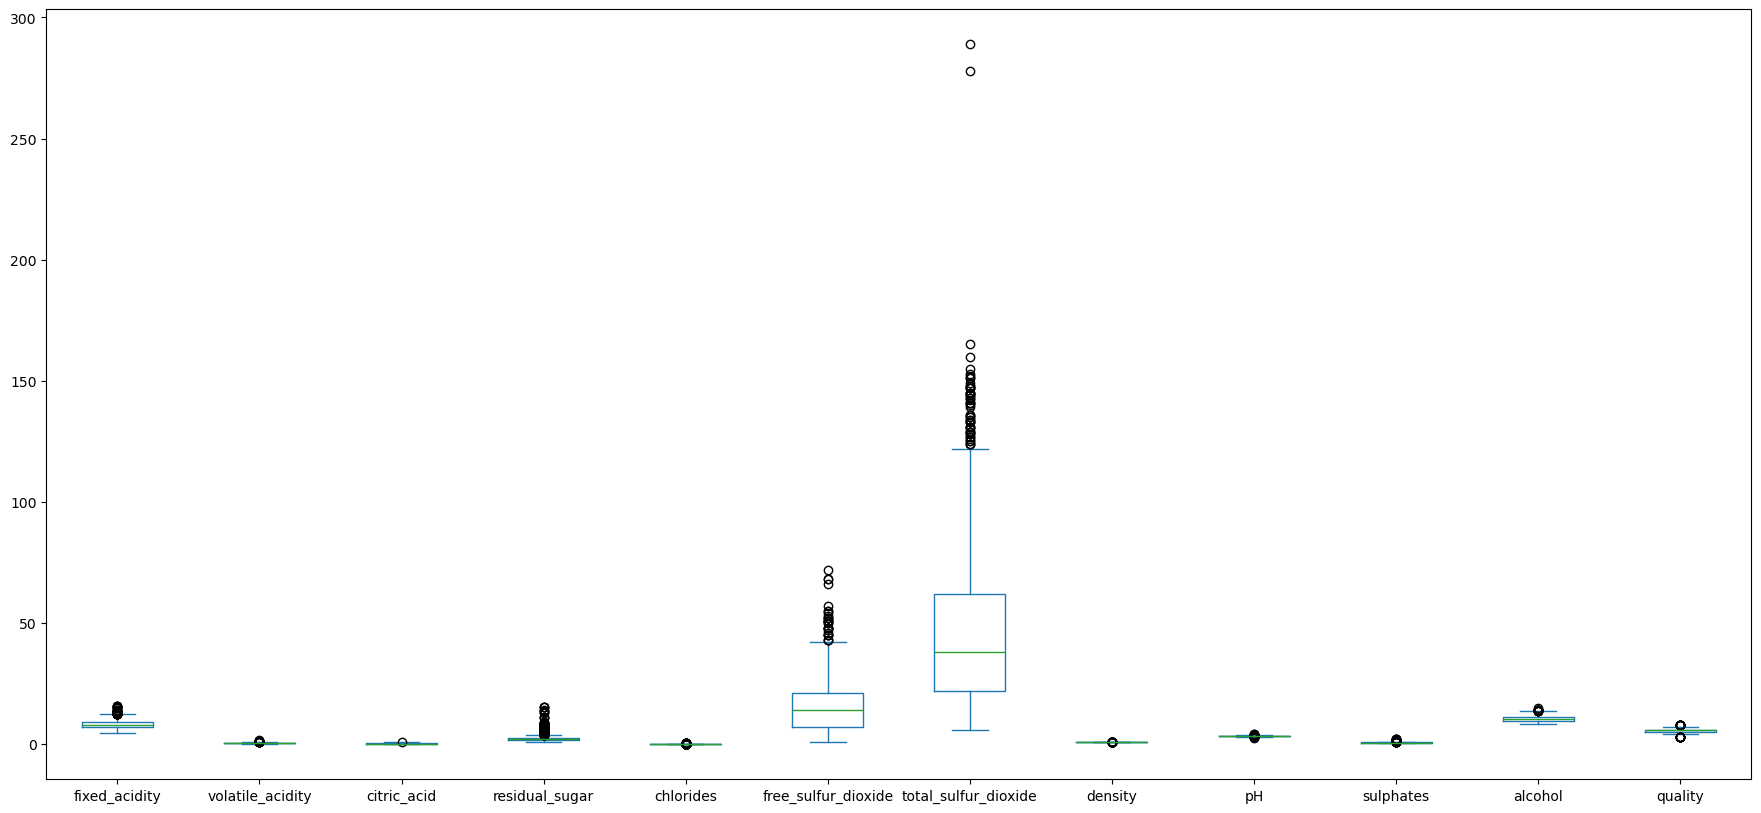

In [ ]:
cols_f = winequality_df.iloc[:, :12]
cols_f.plot(kind="box", subplots=True, layout=(3, 9), sharex=False, sharey=False, figsize=(20,10))
cols_f.plot(kind="box", figsize=(22,10))
plt.savefig("abc.pdf")

**Nhận xét:**
- Ngoại trử citric_acid ra các yếu tố khác đều có rất nhiều giá trị outlier, khiến chúng bị lệch phải và trái nhiều

2) Histogram


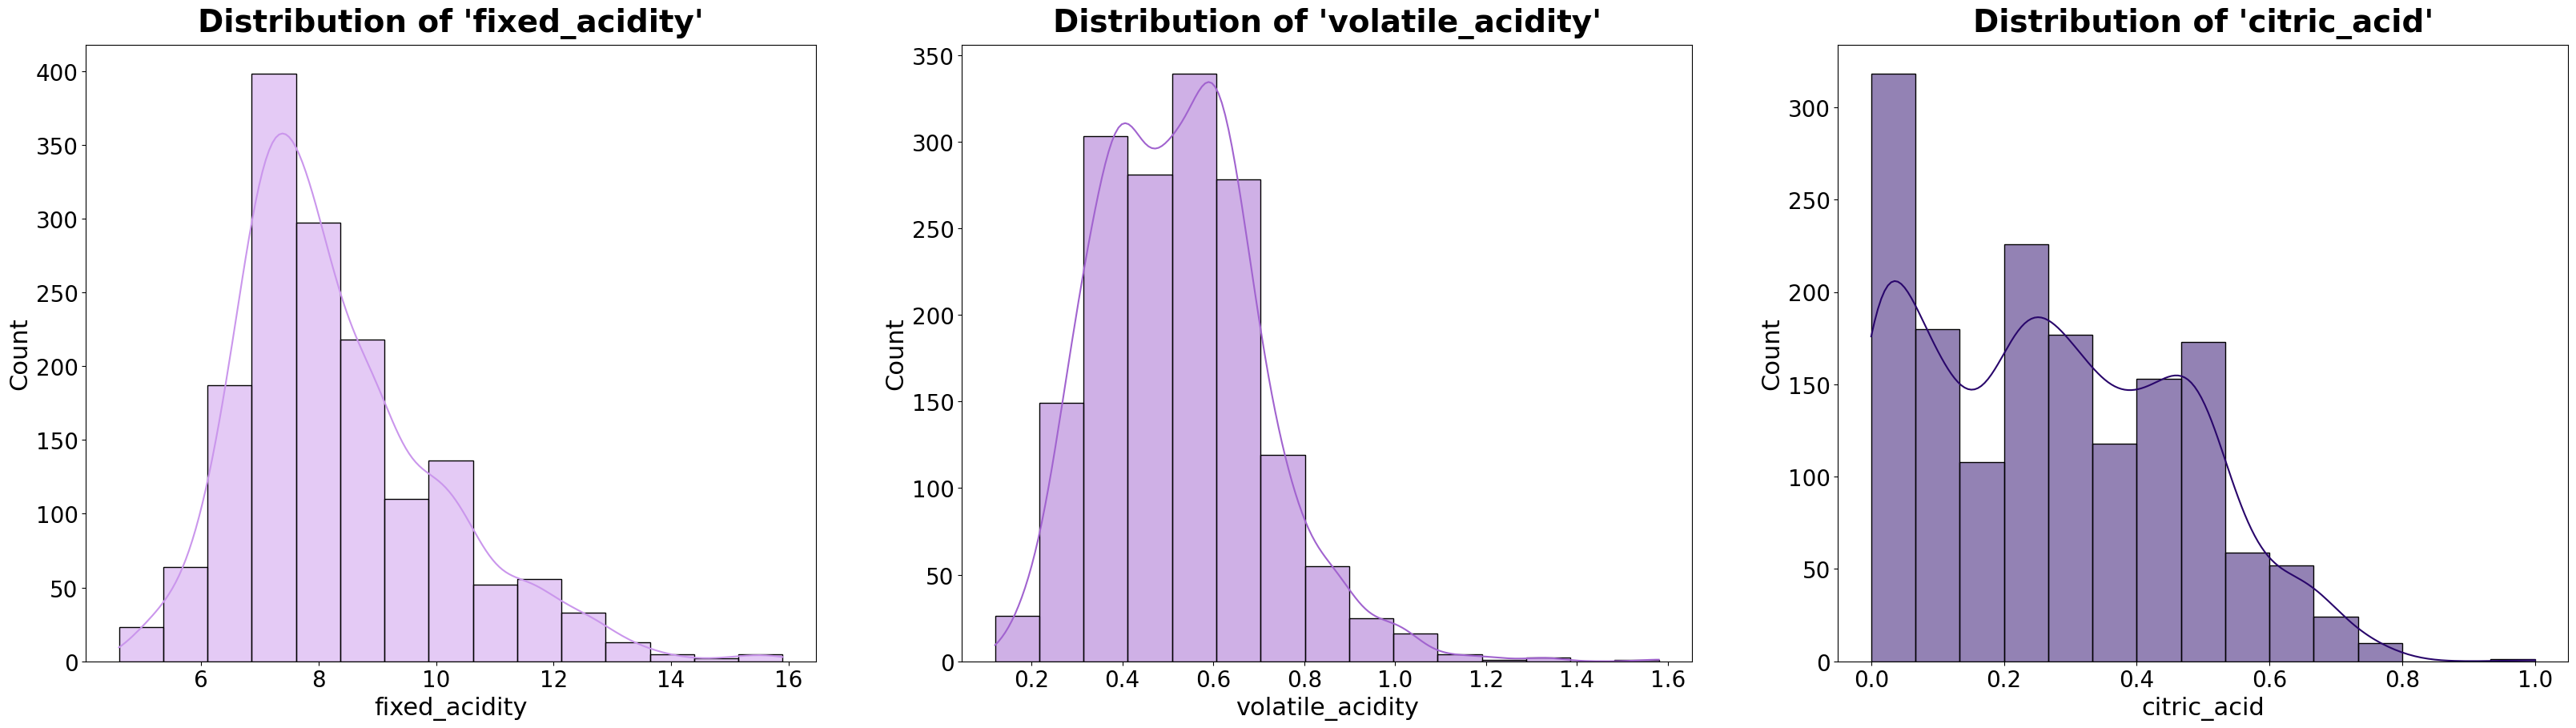

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = winequality_df["fixed_acidity"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixed_acidity'")

sns.histplot(ax = axes[1], x = winequality_df["volatile_acidity"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile_acidity'")

sns.histplot(ax = axes[2], x = winequality_df["citric_acid"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric_acid'")
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của fixed_acidity, volatile_acidity và citric_acid ta thấy rằng độ phân bố bị lệch phải 
- Tuy nhiên với biểu đồ fixed_acidity lại cân đối khi có 1 đỉnh, 2 biểu đồ còn lại thì xuất hiện nhiều đỉnh
1. Đối với fixed_acidity các giá trị nằm trong khoảng $[7-8]$
2. Đối với volatile_acidity các giá trị nằm trong khoảng $[0.4 - 0.7]$
3. Đối với citric_acid các giá trị nằm trong khoảng $[0.0 - 0.1]$

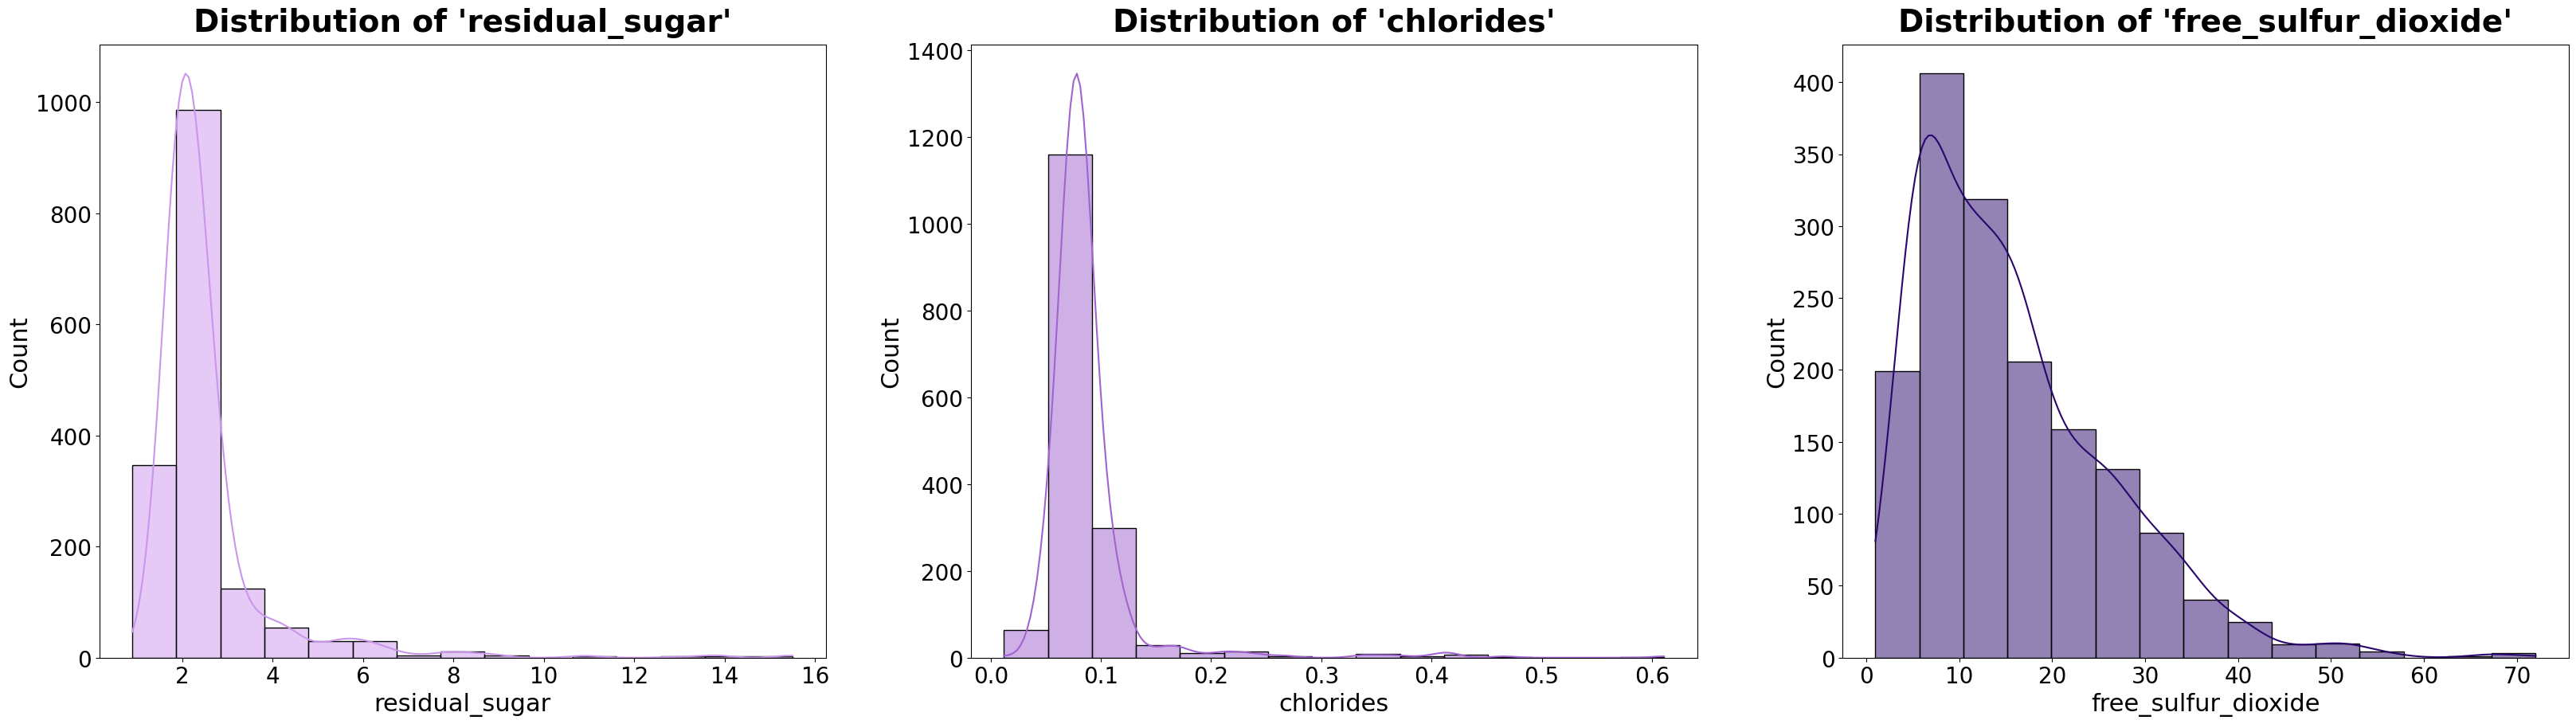

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))
sns.histplot(ax = axes[0], x = winequality_df["residual_sugar"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'residual_sugar'")

sns.histplot(ax = axes[1], x = winequality_df["chlorides"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'chlorides'")

sns.histplot(ax = axes[2], x = winequality_df["free_sulfur_dioxide"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'free_sulfur_dioxide'")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của residual_sugar, chlorides và free_sulfur_dioxide ta thấy rằng độ phân bố bị lệch phải 
- Tuy nhiên cả 3 biểu đồ này đều khá cân đối
1. Đối với residual_sugar các giá trị nằm trong khoảng $[1 - 2.5]$
2. Đối với chlorides các giá trị nằm trong khoảng $[0.085 - 0.15]$
3. Đối với free_sulfur_dioxide các giá trị nằm trong khoảng $[0 - 15]$

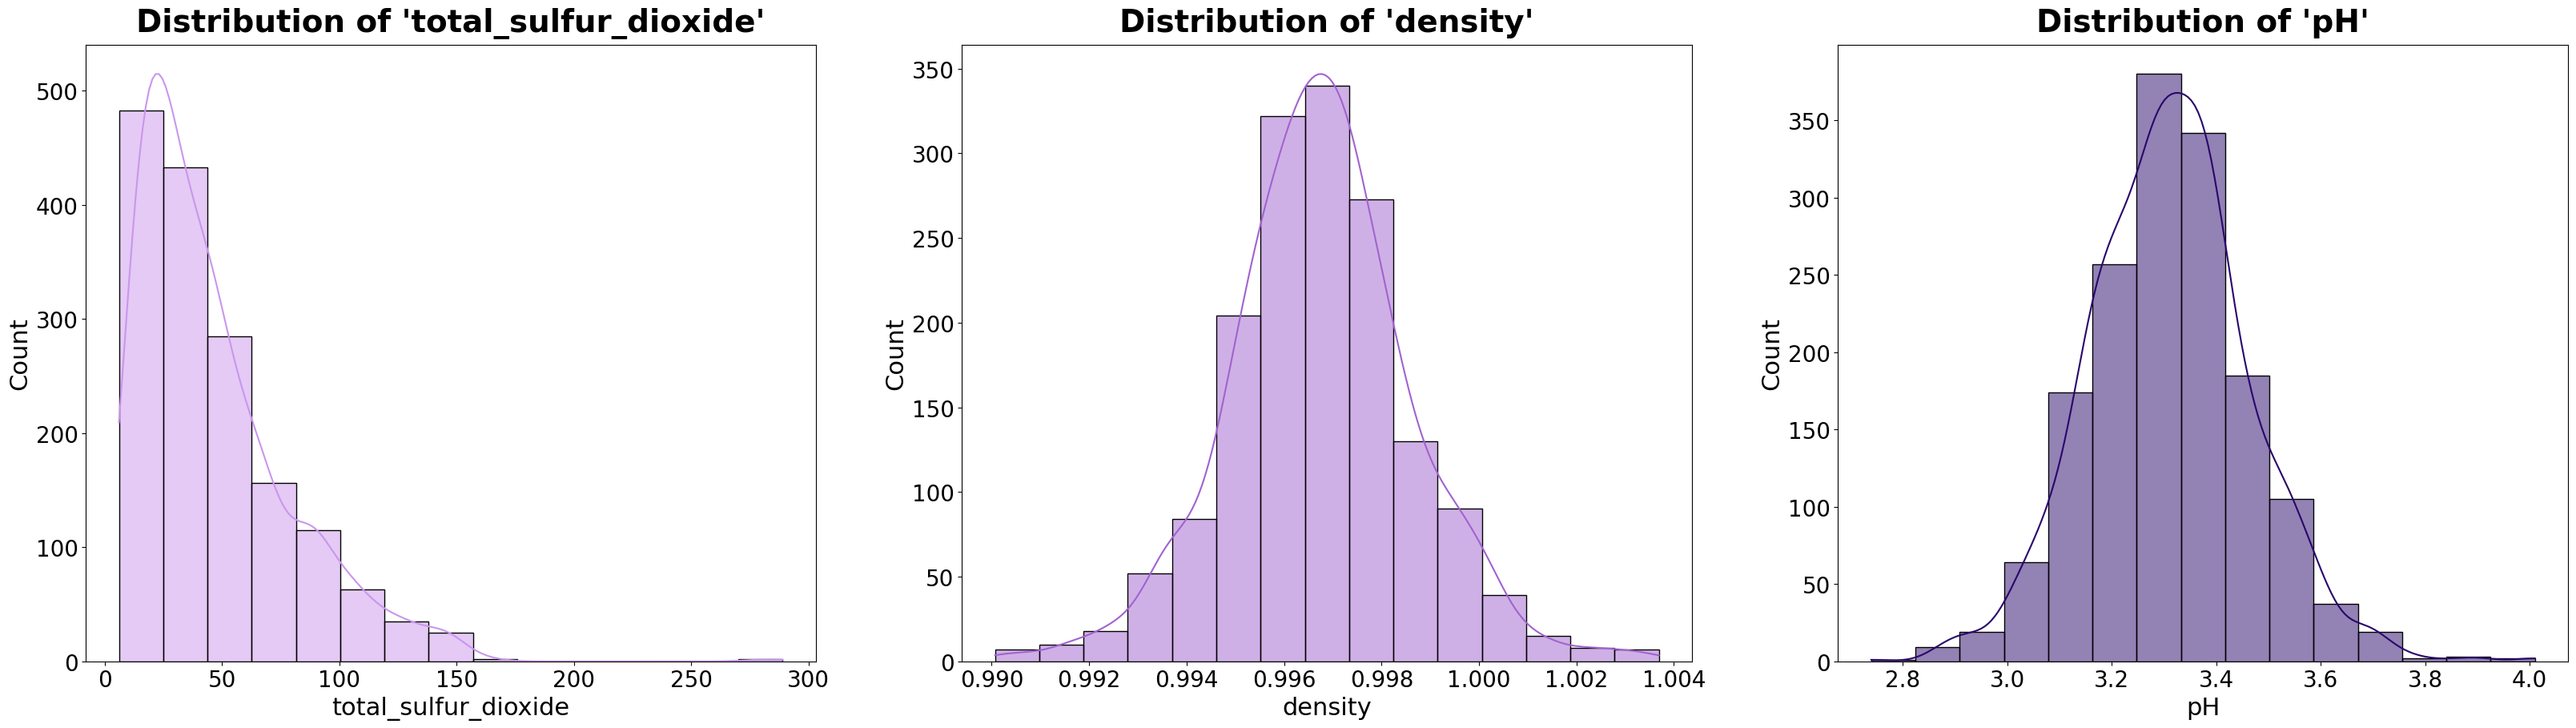

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))
sns.histplot(ax = axes[0], x = winequality_df["total_sulfur_dioxide"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'total_sulfur_dioxide'")

sns.histplot(ax = axes[1], x = winequality_df["density"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'density'")

sns.histplot(ax = axes[2], x = winequality_df["pH"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'pH'")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của total_sulfur_dioxide, density và pH ta thấy rằng độ phân bố bị lệch phải 
- Tuy nhiên cả 3 biểu đồ này đều khá cân đối
1. Đối với total_sulfur_dioxide các giá trị nằm trong khoảng $[0 - 30]$
2. Đối với density các giá trị nằm trong khoảng $[0.995 - 0.998]$
3. Đối với pH các giá trị nằm trong khoảng $[3.2 - 3.4]$

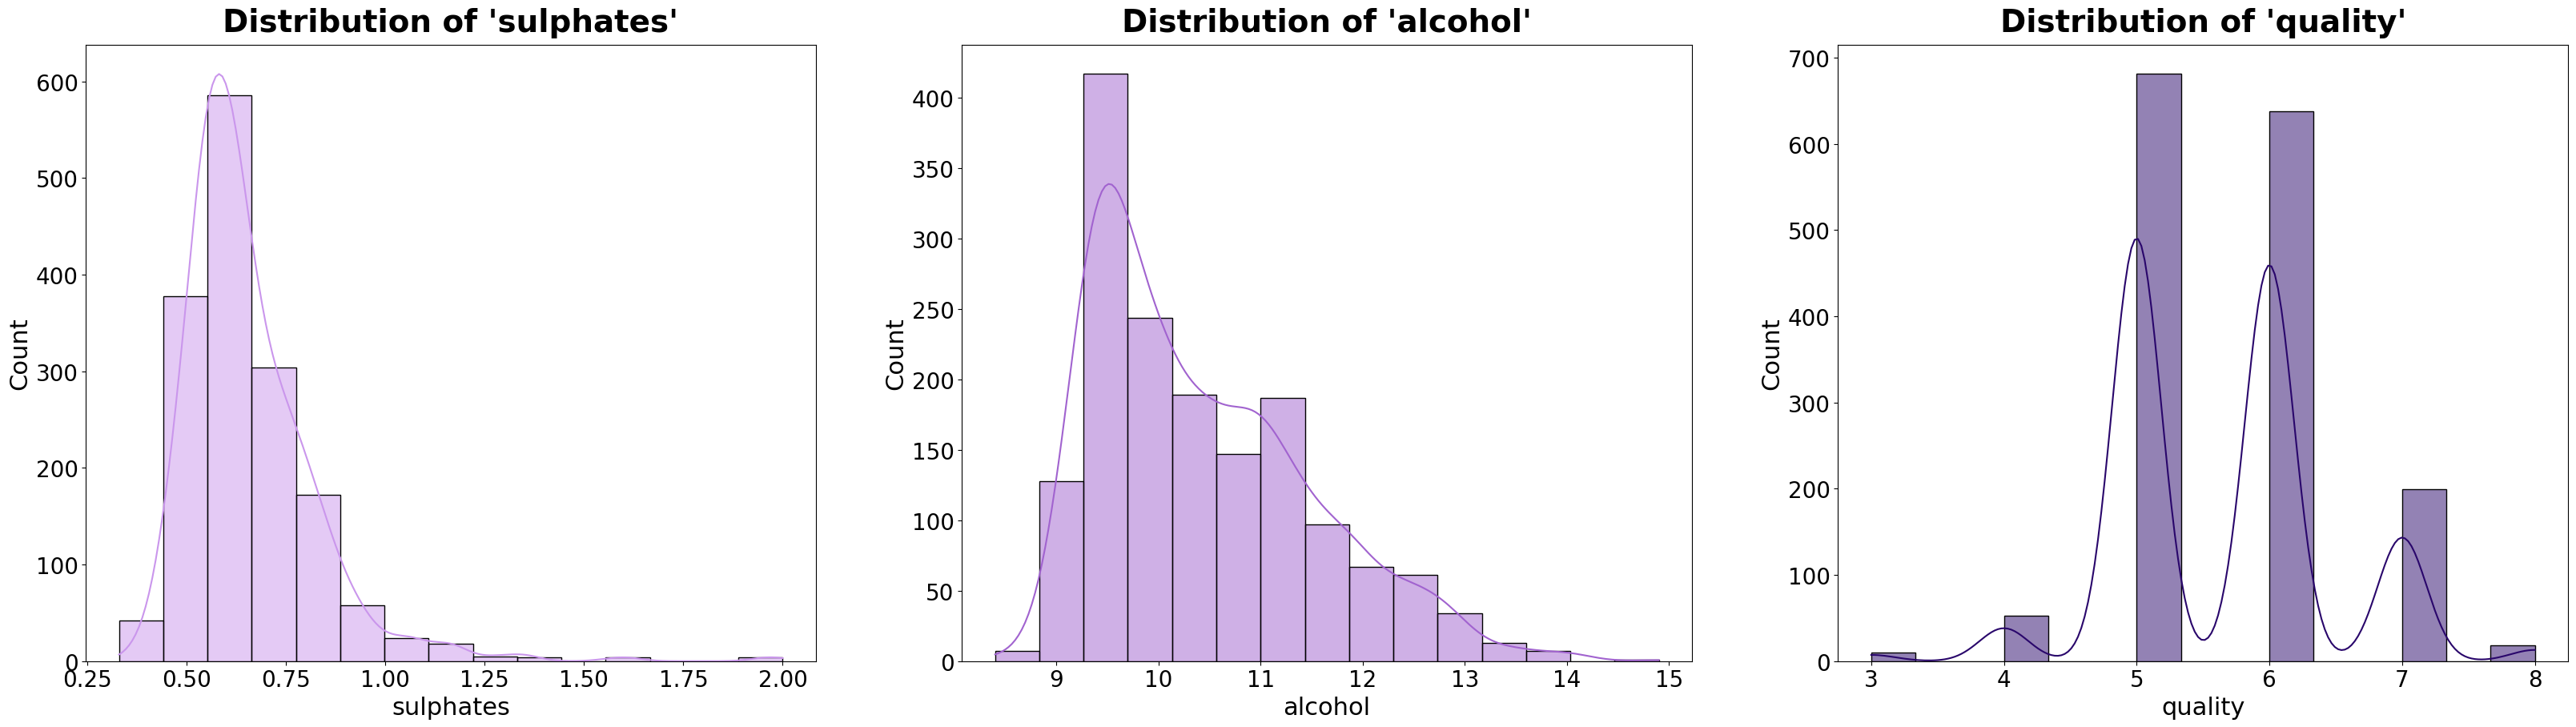

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))
sns.histplot(ax = axes[0], x = winequality_df["sulphates"],
             bins = 15,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'sulphates'")

sns.histplot(ax = axes[1], x = winequality_df["alcohol"],
             bins = 15,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'alcohol'")

sns.histplot(ax = axes[2], x = winequality_df["quality"],
             bins = 15,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'quality'")

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=22)
    ax.set_ylabel(ax.get_ylabel(), fontsize=22)
    ax.set_title(ax.get_title(), fontsize=28, fontweight="bold", pad=12)

**Nhận xét:**
- Từ biểu đồ của sulphates, alcohol ta thấy rằng độ phân bố bị lệch phải
- Tuy nhiên sulphates phân phối đều, đối với alcohol thì khá cân bằng. Ngoại trừ quality thì nhiều đỉnh khiến phân bố lộn xộn 
1. Đối với sulphates các giá trị nằm trong khoảng $[0.50 - 0.75]$
2. Đối với alcohol các giá trị nằm trong khoảng $[9 - 10]$
3. Đối với quality các giá trị nằm trong khoảng $5$ và $6$

3) Scatter


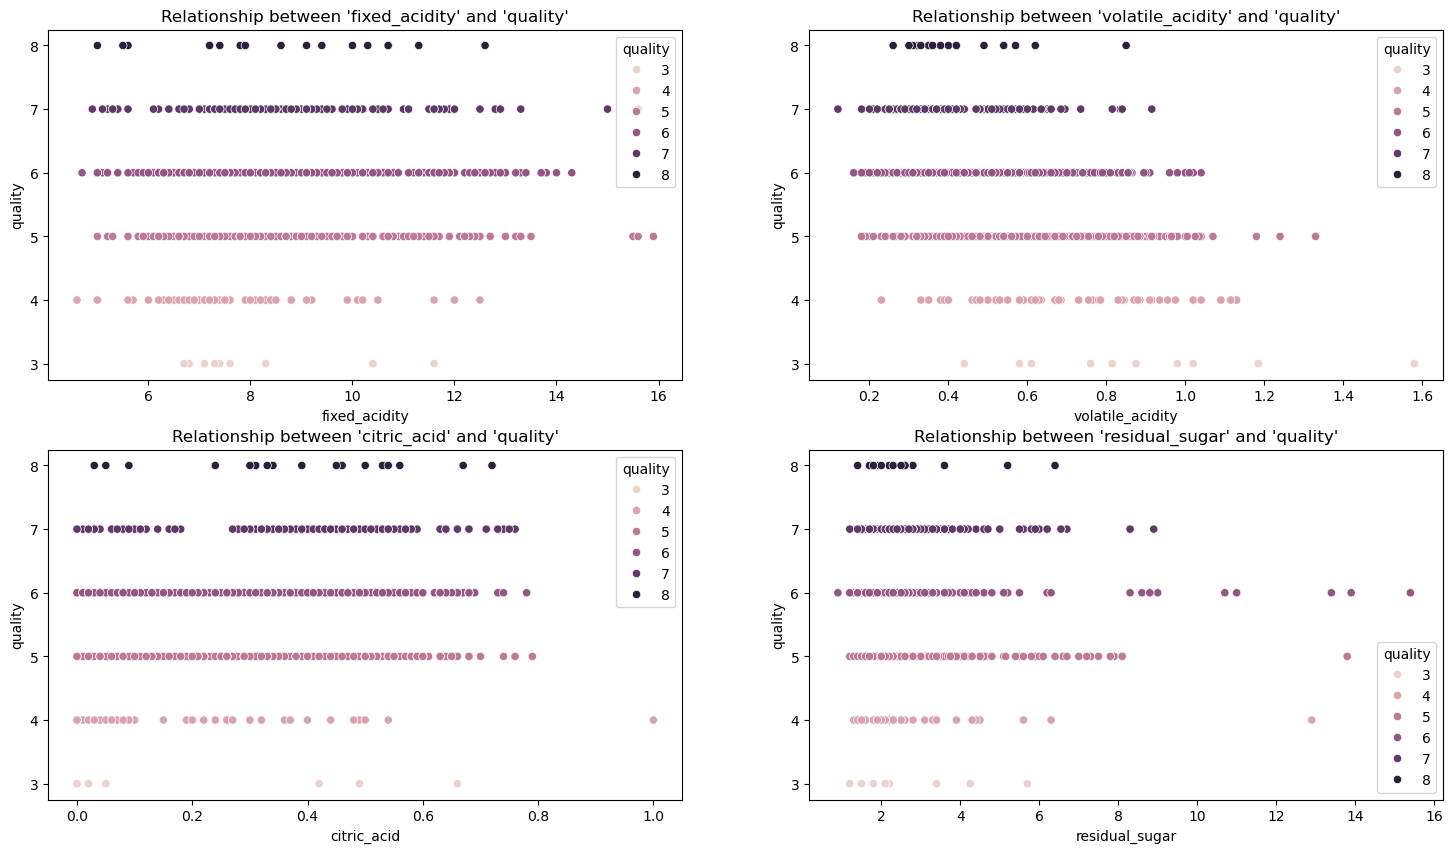

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "fixed_acidity",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'fixed_acidity' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "volatile_acidity",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'volatile_acidity' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "citric_acid",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'citric_acid' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'residual_sugar' and 'quality'");

**Nhận xét**
Dựa trên phân tích sơ bộ, ta phân tích từng yếu tố:
-	Đối với fixed_acidity với quality, các data point trải dài từ chất lượng $4-7$ so với độ axit từ thấp đến cao. Vì điều này ta nhận định rằng không có một xu hướng nào rõ ràng cho thấy việc rượu có độ axit cao hơn thì chất lượng tốt hơn và ngược lại.
    - Độ axit cố định (fixed_acidity) không phải là một yếu tố ảnh hưởng đến chất lượng của rượu.
-	Đối với volatile_acidity với quality, ta có thể thấy rõ đối với các loại rượu chất lượng cao $(6, 7, 8)$ tập trung đa số với hàm lượng axit bay hơi thấp $(< 0.5)$ và ngược lại.
    - Dựa vào điều trên ta thấy được volatile_acidity hay axit bay hơi là yếu tố quan trọng. Nguyên nhân là trong rượu nếu có hàm lượng axit bay hơi cao sẽ xuất hiện mùi giống như giấm, khiến chất lượng rượu đi xuống.
-	Đối với citric_acid, tuy data point phân bố trải dài. Nhưng khi lượng axit citric từ $0.3$ trở đi thì chất lượng rượu cao tập trung nhiều. 
    - Yếu tố citric_acid cũng phản ánh được chất lượng nếu lượng hàm lượng axit citric cao. Có thể là hàm lượng axit citric cao làm cho rượu có độ freshness cao hơn, giúp cải thiện cảm quan của người sử dụng.
-	Tương tự như biểu đồ fixed_acidity thì với residual_sugar, các điểm dữ liệu phân bổ rộng và không theo một quy luật rõ ràng. Rượu có chất lượng từ thấp đến cao đều có thể có lượng đường tồn dư thấp hoặc cao.
    - Residual_sugar không phải là một yếu tố có ảnh hưởng rõ rệt đến chất lượng rượu vang.



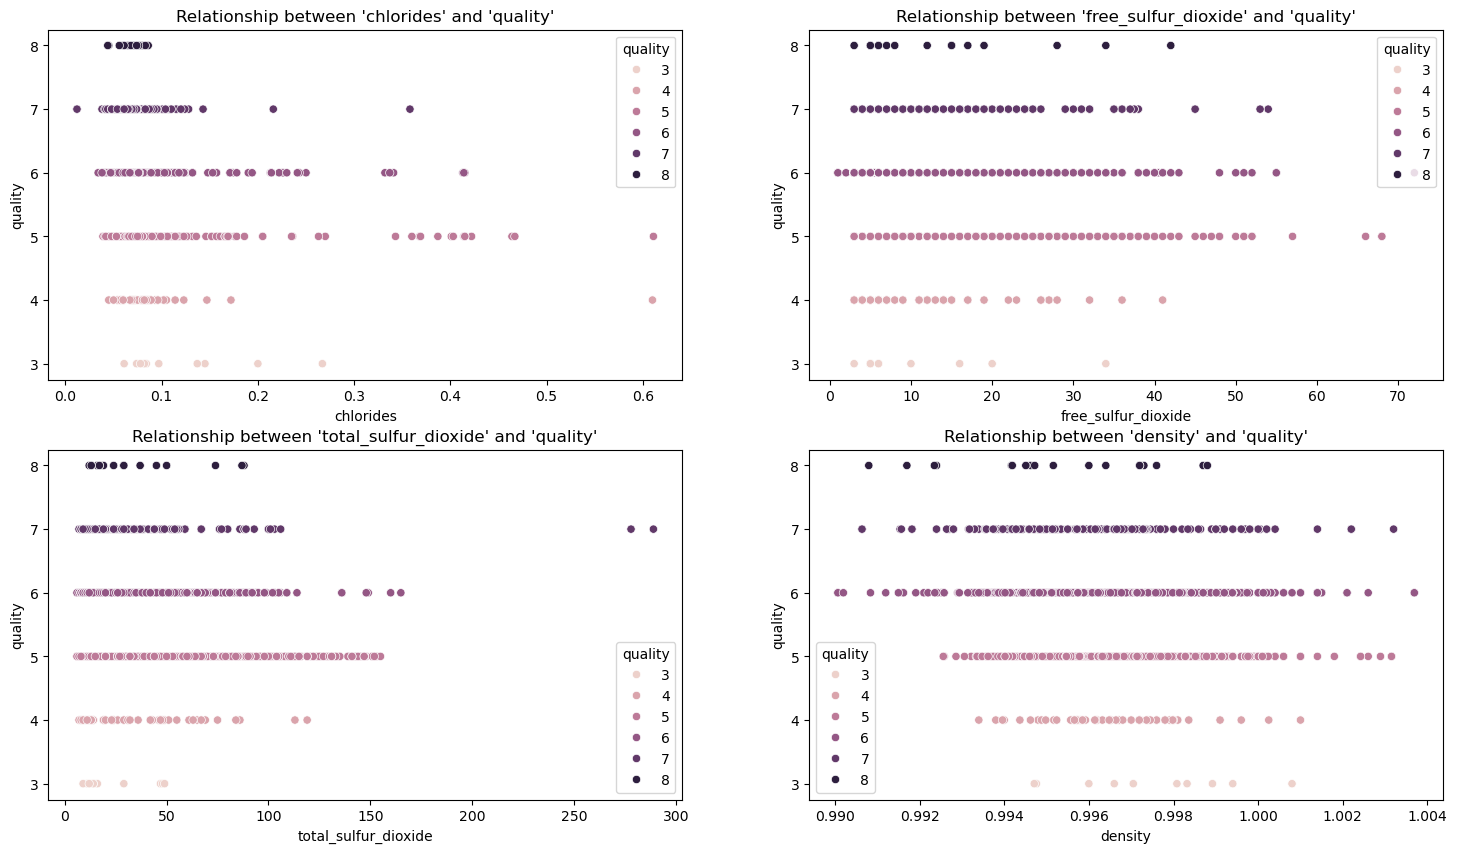

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "chlorides",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'chlorides' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "free_sulfur_dioxide",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'free_sulfur_dioxide' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "total_sulfur_dioxide",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'total_sulfur_dioxide' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'density' and 'quality'");

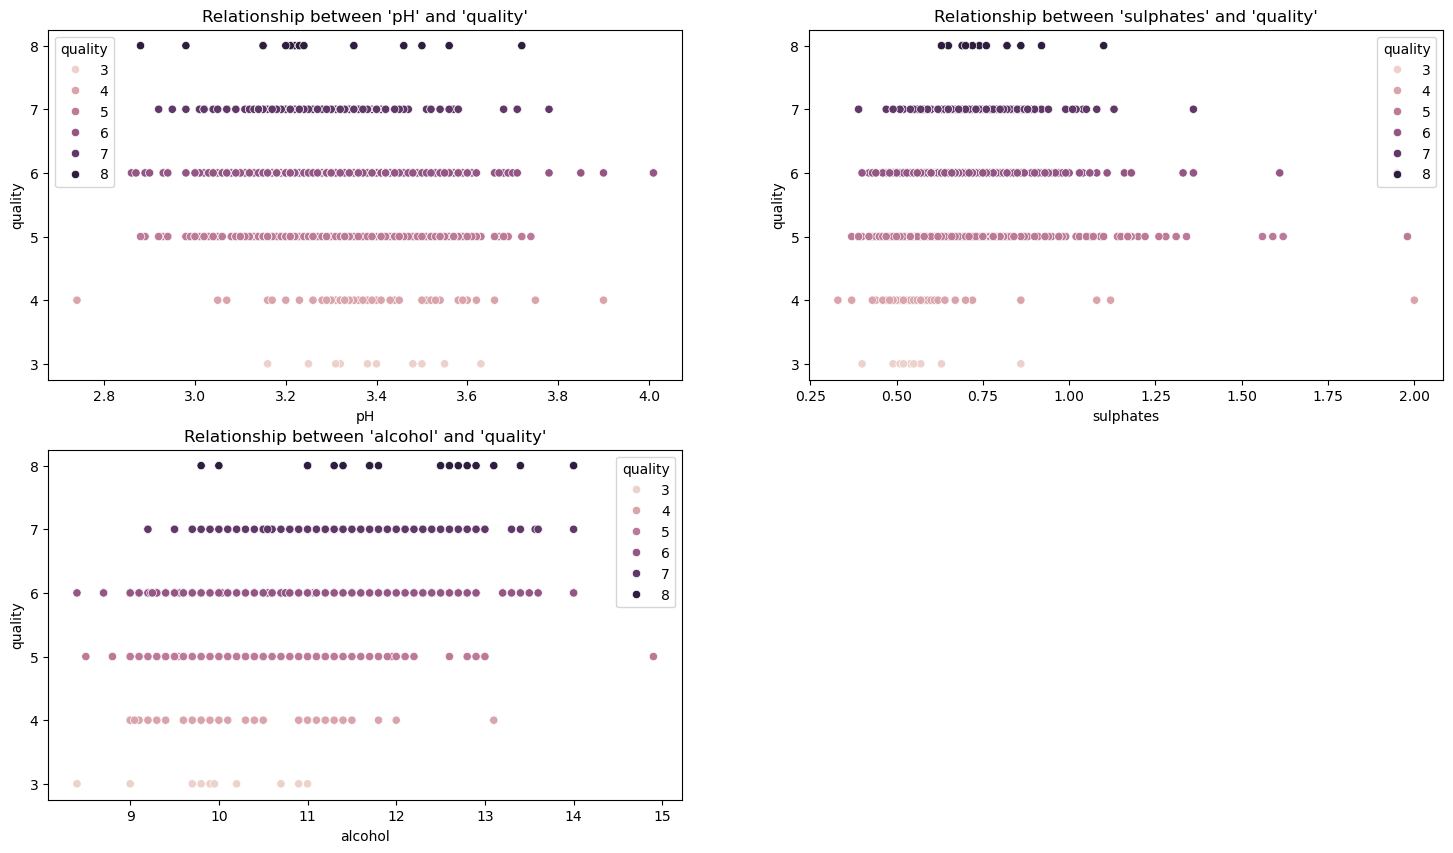

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "pH",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "sulphates",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'sulphates' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = winequality_df).set(title = "Relationship between 'alcohol' and 'quality'");
fig.delaxes(axes[3])

# KẾT THÚC 